# Нелинейное программирование. Безусловная оптимизация

## Инициализация окружения

In [1]:
import numpy as np
import numpy.linalg as la
from scipy.optimize import fmin_cg, fmin_bfgs
from scipy.misc import derivative
import csv
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.lines as lines

## Целевая функция

In [2]:
def target_function(x):
    x1 = x[0]
    x2 = x[1]
    return 17 * x1 ** 2 + 23 * x2 ** 2 - 8 * x1 * x2 - 182 * x1 - 266 * x2

## Градиент целевой функции

In [3]:
def gradient(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([-34 * x1 + 8 * x2 + 182, -46 * x2 + 8 * x1 + 266])

## Гессиан

In [4]:
def hessian(x=0):
    return np.array([[-34, 8], [8, -46]])

## Вспомогательные функции для информативного вывода результатов

In [5]:
def to_csv(xk):
    writer.writerow((xk[0], xk[1], -target_function(xk)))
    print('x_1={x1},\t x_2={x2},\t f(X)={f}'.format(x1=xk[0], x2=xk[1], f=-target_function(xk)))

## Визуализация метода

In [6]:
def plot_level_contour(x1s, x2s, name, title):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'

    delta = 0.5
    x = np.arange(-1, 15, delta)
    y = np.arange(-1, 15, delta)
    X, Y = np.meshgrid(x, y)
    Z = target_function([X, Y])

    fig = plt.figure(figsize=(5, 5), dpi=120)
    CS = plt.contour(X, Y, Z, 10)

    plt.plot(x1s, x2s)

    matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
    plt.clabel(CS, inline=1, fontsize=8)
    plt.title(title)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.savefig('../report/pics/' + name)
    plt.show()

## Метод релаксации

x_1=0,	 x_2=0,	 f(X)=0
x_1=5.352941176470588,	 x_2=0.0,	 f(X)=487.1176470588235
x_1=5.352941176470588,	 x_2=6.713554987212275,	 f(X)=1523.7695200842486
x_1=6.932601173461713,	 x_2=6.713554987212277,	 f(X)=1566.1900570878463
x_1=6.932601173461713,	 x_2=6.988278464949863,	 f(X)=1567.925935839912
x_1=6.99724199175291,	 x_2=6.988278464949863,	 f(X)=1567.9969692415311
x_1=6.997241991752909,	 x_2=6.99952034639181,	 f(X)=1567.9998759791931
x_1=6.999887140327485,	 x_2=6.99952034639181,	 f(X)=1567.9999949249798
x_1=6.999887140327485,	 x_2=6.999980372230867,	 f(X)=1567.9999997923262


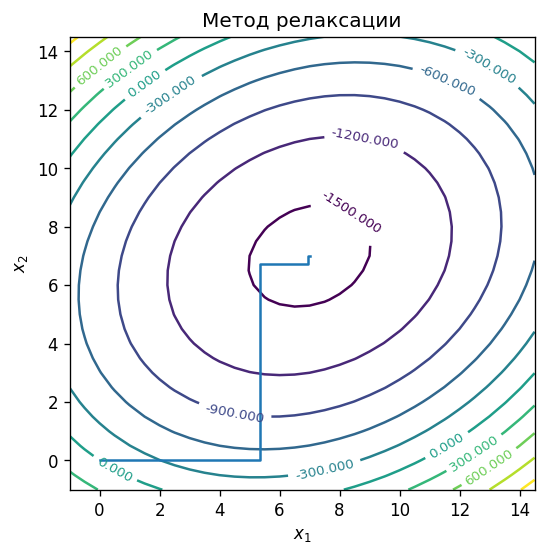

In [7]:
def fmin_relax(f: callable, x0: list, gf: callable, hf: callable, stop: float, on_each_step: callable):
    x1s = []
    x2s = []
    steps = 0
    xi = x0
    gfi = gf(xi)
    ki = np.array([gfi[0], 0])
    on_each_step(xi)
    x1s.append(xi[0])
    x2s.append(xi[1])
    while la.norm(gfi) > stop:
        steps += 1
        ti = -(gfi.dot(ki)) / (ki.transpose().dot(hf()).dot(ki))
        xi += ti * ki
        x1s.append(xi[0])
        x2s.append(xi[1])
        on_each_step(xi)
        gfi = gf(xi)
        ki = gfi
    return [xi, f(xi), steps, np.array(x1s), np.array(x2s)]


file_name = '../report/data/relax.csv'
f = open(file_name, 'w', newline='')
writer = csv.writer(f)
writer.writerow(('x1', 'x2', 'f'))
xopt, fopt, steps, x1s, x2s = fmin_relax(target_function, [0, 0], gradient, hessian, 0.01, to_csv)
f.close()

plot_level_contour(x1s, x2s, 'relax', 'Метод релаксации')

## Метод Ньютона

x_1=0,	 x_2=0,	 f(X)=0
x_1=7.0,	 x_2=7.0,	 f(X)=1568.0


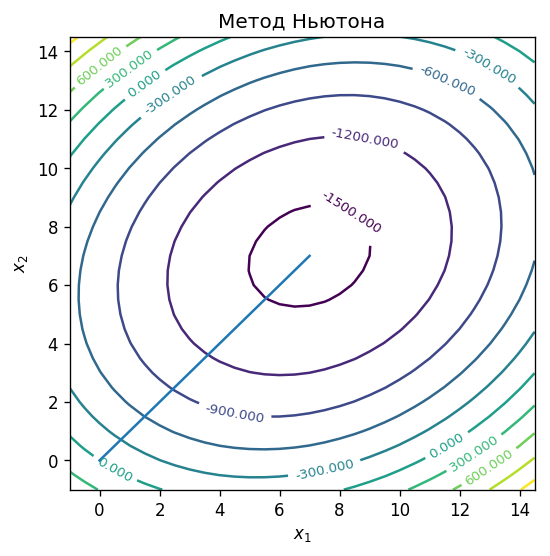

In [8]:
def fmin_newton(f: callable, x0: list, gf: callable, hf: callable, stop: float, on_each_step: callable):
    x1s = []
    x2s = []
    steps = 0
    xi = x0
    gfi = gf(xi)
    ti = 1
    on_each_step(xi)
    x1s.append(xi[0])
    x2s.append(xi[1])
    while la.norm(gfi) > stop:
        steps += 1
        ki = - la.inv(hf()).dot(gfi)
        xi += ti * ki
        x1s.append(xi[0])
        x2s.append(xi[1])
        on_each_step(xi)
        gfi = gf(xi)
    return [xi, f(xi), steps, np.array(x1s), np.array(x2s)]


file_name = '../report/data/newton.csv'
f = open(file_name, 'w', newline='')
writer = csv.writer(f)
writer.writerow(('x1', 'x2', 'f'))
xopt, fopt, steps, x1s, x2s = fmin_newton(target_function, [0, 0], gradient, hessian, 0.01, to_csv)
f.close()

plot_level_contour(x1s, x2s, 'newton', 'Метод Ньютона')

## Метод наискорейшего градиентного подъёма (спуска)

x_1=0,	 x_2=0,	 f(X)=0
x_1=5.2423913043478265,	 x_2=7.66195652173913,	 f(X)=1496.0978260869567
x_1=6.679008152173913,	 x_2=6.679008152173913,	 f(X)=1564.7028554761343
x_1=6.919403133861059,	 x_2=7.030354663870511,	 f(X)=1567.8488062123909
x_1=6.985280604804172,	 x_2=6.985280604804171,	 f(X)=1567.993066860962
x_1=6.996304151858438,	 x_2=7.001391942806562,	 f(X)=1567.9996820741273
x_1=6.999325027733887,	 x_2=6.999325027733887,	 f(X)=1567.999985421198
x_1=6.999830523267964,	 x_2=7.000063828899078,	 f(X)=1567.9999993314748


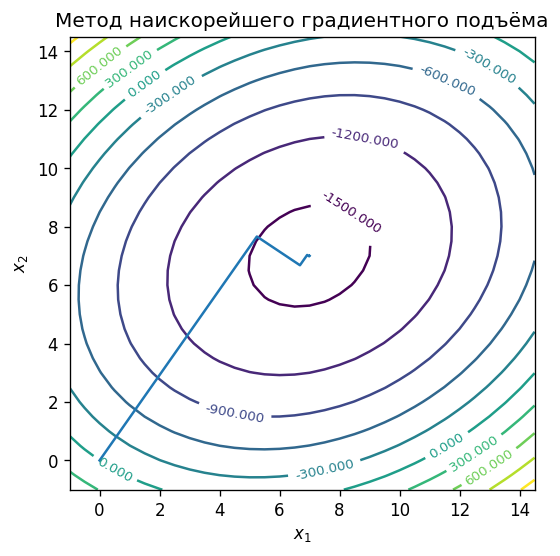

In [9]:
def fmin_gd(f: callable, x0: list, gf: callable, hf: callable, stop: float, on_each_step: callable):
    x1s = []
    x2s = []
    steps = 0
    xi = x0
    gfi = gf(xi)
    on_each_step(xi)
    x1s.append(xi[0])
    x2s.append(xi[1])
    while la.norm(gfi) > stop:
        steps += 1
        ki = gfi
        ti = -(gfi.dot(ki)) / (ki.transpose().dot(hf()).dot(ki))
        xi += ti * ki
        x1s.append(xi[0])
        x2s.append(xi[1])
        on_each_step(xi)
        gfi = gf(xi)
    return [xi, f(xi), steps, np.array(x1s), np.array(x2s)]


file_name = '../report/data/gd.csv'
f = open(file_name, 'w', newline='')
writer = csv.writer(f)
writer.writerow(('x1', 'x2', 'f'))
xopt, fopt, steps, x1s, x2s = fmin_gd(target_function, [0, 0], gradient, hessian, 0.01, to_csv)
f.close()

plot_level_contour(x1s, x2s, 'gd', 'Метод наискорейшего градиентного подъёма')

## Метод сопряжённых градиентов (Conjugate Gradient method)

In [10]:
x0 = np.array([0, 0])

file_name = '../report/data/cg.csv'
f = open(file_name, 'w', newline='')
writer = csv.writer(f)
writer.writerow(('x1', 'x2', 'f'))
to_csv(x0)
xopt, msg = fmin_cg(target_function, x0, callback=to_csv)
f.close()
print(xopt, msg)

x_1=0,	 x_2=0,	 f(X)=0
x_1=5.361109094252702,	 x_2=7.835467138564297,	 f(X)=1495.3305834091711
x_1=7.125213729861292,	 x_2=7.185423921587326,	 f(X)=1567.1284201321148
x_1=7.054765530994868,	 x_2=6.994239380665157,	 f(X)=1567.9457254065308
x_1=7.000000326775502,	 x_2=6.999999844649399,	 f(X)=1567.9999999999973
Optimization terminated successfully.
         Current function value: -1568.000000
         Iterations: 4
         Function evaluations: 40
         Gradient evaluations: 10
7.00000032678 6.99999984465


## Метод Бройдена (BFGS)

In [11]:
x0 = np.array([0, 0])

file_name = '../report/data/bfgs.csv'
f = open(file_name, 'w', newline='')
writer = csv.writer(f)
writer.writerow(('x1', 'x2', 'f'))
to_csv(x0)
xopt = fmin_bfgs(target_function, x0, callback=to_csv)
f.close()

print(xopt)

x_1=0,	 x_2=0,	 f(X)=0
x_1=0.5703307547077343,	 x_2=0.8335603338898189,	 f(X)=307.8198499446669
x_1=3.1270769590102674,	 x_2=0.1430122836507337,	 f(X)=444.04017429337677
x_1=3.6011566481364348,	 x_2=0.982367647852593,	 f(X)=702.363923604765
x_1=4.625584461705584,	 x_2=2.7961118873142676,	 f(X)=1145.539251452151
x_1=6.999999284449173,	 x_2=6.9999989800202975,	 f(X)=1567.999999999973
x_1=7.000000464462481,	 x_2=7.000000180378583,	 f(X)=1567.9999999999964
x_1=6.999999889250844,	 x_2=7.000000160651894,	 f(X)=1567.9999999999989
Optimization terminated successfully.
         Current function value: -1568.000000
         Iterations: 7
         Function evaluations: 36
         Gradient evaluations: 9
[ 6.99999989  7.00000016]
